> GCRN

Chat-GPT 참조

논문 proposed method 에 추가

사용한 기존 알고리즘(STGCN에 존재) 소개

# [GCRN](https://arxiv.org/pdf/1612.07659.pdf)

a combination model of graph convolution neural netwotk and LSTM(Long Short-Term Memory) 그래프 합성곱 신경망과 순환 신경망을 결합한 모델

1. 그래프 합성곱 신경망 레이어

- 그래프의 구조를 고려하여 각 노드의 특성을 추출합니다.
- 논문에서는 Chebyshev 다항식을 이용한 그래프 합성곱 신경망을 사용했습니다.

$\mathbf{H}^{(l)} = \sigma(\hat{\mathbf{A}}\mathbf{H}^{(l-1)}\mathbf{W}^{(l-1)})$

$\hat{\mathbf{A}} = \tilde{\mathbf{D}}^{-\frac{1}{2}}\tilde{\mathbf{A}}\tilde{\mathbf{D}}^{-\frac{1}{2}}$

여기서 $\mathbf{H}^{(l)}$는 l번째 그래프 합성곱 레이어에서의 출력이며, $\sigma(\cdot)$는 비선형 활성화 함수입니다. $\tilde{\mathbf{A}}=\mathbf{A}+\mathbf{I}$는 입력 그래프의 adjacency matrix인 $\mathbf{A}$에 self-connection을 추가한 것입니다. $\tilde{\mathbf{D}}$는 $\tilde{\mathbf{A}}$의 차수 행렬(degree matrix)입니다.

2. 순환 신경망 레이어

- 시계열 데이터의 시간적인 의존성을 고려하여 각 시간 단계에서의 정보를 추출합니다.
- 논문에서는 LSTM(Long Short-Term Memory)을 사용했습니다.

$\begin{pmatrix} \mathbf{i}{t} \ \mathbf{f}{t} \ \mathbf{o}{t} \ \mathbf{g}{t} \end{pmatrix} = \begin{pmatrix} \sigma \ \sigma \ \sigma \ \tanh \end{pmatrix} \mathbf{W} \begin{pmatrix} \mathbf{x}{t} \ \mathbf{h}{t-1} \end{pmatrix}$

$\mathbf{a}{t} = \tilde{\mathbf{D}}{g}^{-\frac{1}{2}}\tilde{\mathbf{A}}{g}\tilde{\mathbf{D}}{g}^{-\frac{1}{2}}\mathbf{h}_{t-1}$

$\begin{pmatrix} \mathbf{u}{t} \ \mathbf{r}{t} \end{pmatrix} = \begin{pmatrix} \sigma \ \sigma \end{pmatrix} \mathbf{W}{a} \begin{pmatrix} \mathbf{a}{t} \ \mathbf{h}_{t-1} \end{pmatrix}$

$\mathbf{h}{t} = \mathbf{f}{t}\odot \mathbf{h}{t-1} + \mathbf{i}{t}\odot \mathbf{g}_{t}$

$\mathbf{h}{t} = \mathbf{u}{t} \odot \mathbf{h}{t} + \mathbf{r}{t}\odot \tanh\bigg(\tilde{\mathbf{D}}{l}^{-\frac{1}{2}}\tilde{\mathbf{A}}{l}\tilde{\mathbf{D}}{l}^{-\frac{1}{2}}\mathbf{h}{t}\mathbf{W}_{h}\bigg)$

여기서 $\mathbf{h}{t}$는 t번째 시간 단계에서의 LSTM hidden state입니다. $\mathbf{x}{t}$는 t번째 시간 단계에서의 input feature입니다. $\mathbf{i}{t}$, $\mathbf{f}{t}$, $\mathbf{o}{t}$, $\mathbf{g}{t}$는 각각 input gate, forget gate, output gate, cell state에 대한 벡터입니다. $\mathbf{W}$는 LSTM에 대한 가중치 매개변수입니다.

위의 식에서 $\tilde{\mathbf{A}}_g$와 $\tilde{\mathbf{D}}_g$는 LSTM에서 사용되는 그래프의 adjacency matrix와 degree matrix입니다. $\tilde{\mathbf{A}}_l$와 $\tilde{\mathbf{D}}_l$는 LSTM 출력을 위한 그래프의 adjacency matrix와 degree matrix입니다.

GCRN에서는 각 LSTM 시간 단계에서 입력 그래프가 동일하기 때문에, 그래프 합성곱 레이어의 출력이 각 시간 단계마다 재사용됩니다. 이를 통해 입력 그래프에 대한 정보가 재귀적으로 LSTM에 전달되며, 그래프 구조를 반영한 시계열 예측이 가능해집니다.

3. Fully Connected 레이어

- 각 시간 단계에서 추출한 그래프 합성곱 신경망과 순환 신경망에서의 정보를 결합하여, 최종적인 출력을 계산합니다.
- 논문에서는 fully connected layer를 사용하여 이를 수행했습니다.
- GCRN에서는 이러한 레이어들이 여러 겹 쌓여서 전체 모델을 구성합니다. 따라서, 모델은 그래프 합성곱 신경망과 LSTM을 번갈아 가며 적용하고, 마지막으로 fully connected layer에서 출력을 계산합니다. 이렇게 함으로써, 그래프와 시계열 데이터의 정보를 효과적으로 결합하여 다양한 태스크를 수행할 수 있는 모델을 구성할 수 있습니다.


GCRN에서는 이러한 레이어들이 여러 겹 쌓여서 전체 모델을 구성합니다. 따라서, 모델은 그래프 합성곱 신경망과 LSTM을 번갈아 가며 적용하고, 마지막으로 fully connected layer에서 출력을 계산합니다. 이렇게 함으로써, 그래프와 시계열 데이터의 정보를 효과적으로 결합하여 다양한 태스크를 수행할 수 있는 모델을 구성할 수 있습니다.

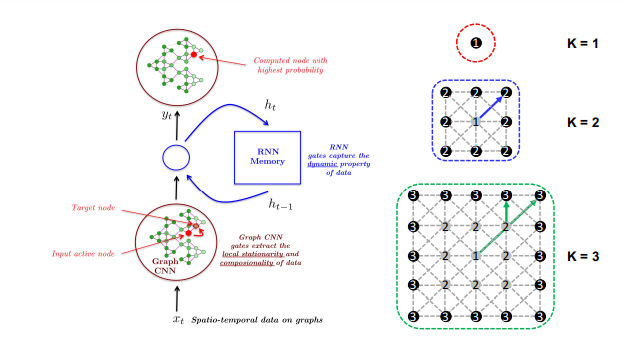

## LSTM

GCRN에서 LSTM은 시계열 데이터와 그래프 데이터를 동시에 모델링하기 위해 사용됩니다. GCRN의 LSTM 레이어는 이전 타임스텝의 LSTM hidden state를 현재 타임스텝의 입력 그래프의 정보와 함께 사용하여 다음 hidden state를 생성합니다.

구체적으로, GCRN의 LSTM 레이어에서는 입력 그래프의 adjacency matrix $A$를 이용하여 Graph Convolutional LSTM (GC-LSTM)을 구성합니다. GC-LSTM은 LSTM 셀과 유사한 구조를 가지면서도 입력과 출력에 대해 그래프 합성곱 연산을 수행합니다. 이를 통해 LSTM은 그래프 구조를 고려한 시계열 데이터 모델링이 가능해집니다.

또한, GCRN에서는 GC-LSTM 레이어를 여러 층으로 쌓아서 더 복잡한 그래프와 시계열 데이터의 모델링이 가능하도록 합니다. 이러한 구조는 GCRN이 다양한 그래프 및 시계열 데이터에 적용 가능하도록 합니다.

## [Chebyshev 다항식](https://ko.wikipedia.org/wiki/%EC%B2%B4%EB%B9%84%EC%87%BC%ED%94%84_%EB%8B%A4%ED%95%AD%EC%8B%9D)

Chebyshev 다항식을 이용한 그래프 합성곱 신경망은 GCRN 모델에서 사용되는 그래프 합성곱 신경망 레이어에서 적용됩니다. 이 방법은 그래프 신경망에서 효율적인 연산을 가능하게 하여 복잡한 그래프에서도 빠른 학습이 가능하도록 합니다.

**Chebyshev 다항식은 그래프 신경망에서 Laplacian 행렬을 특정 다항식으로 근사하는 방법 중 하나입니다. Laplacian 행렬은 그래프에서 노드 간의 연결 관계를 나타내는 행렬이며, 이를 다항식으로 근사함으로써 그래프 합성곱 연산을 수행합니다.**

논문에서는 Chebyshev 다항식을 이용한 그래프 합성곱 신경망의 계산식을 다음과 같이 정의합니다.

$H_{l+1} = \sigma\left(\sum_{i=0}^{K-1}\Theta_{i}^{(l)}T_{i}(L)H^{(l)}\right)$

여기서 $H_{l}$은 $l$번째 레이어에서의 입력 데이터, $H_{l+1}$은 $l+1$번째 레이어에서의 출력 데이터, $\Theta_{i}^{(l)}$은 $i$번째 Chebyshev 다항식에 대한 가중치, $T_{i}(L)$은 Laplacian 행렬 $L$에 대한 $i$번째 Chebyshev 다항식, $\sigma$는 활성화 함수입니다.

이 식에서 $T_{i}(L)$은 재귀적인 방법으로 계산됩니다. 이를 위해서는 Laplacian 행렬 $L$에 대한 최대 $K$차 Chebyshev 다항식 $T_{k}(L)$이 필요합니다. 이 다항식은 다음과 같이 재귀적으로 정의됩니다.

$T_{0}(L) = I$, $T_{1}(L) = L$, $T_{k}(L) = 2LT_{k-1}(L)-T_{k-2}(L)$

여기서 $I$는 단위 행렬입니다. 따라서, $T_{i}(L)$을 계산하기 위해서는 $L$에 대한 $T_{i-1}(L)$과 $T_{i-2}(L)$이 필요합니다. 이를 이용하여 Chebyshev 다항식을 이용한 그래프 합성곱 신경망을 효율적으로 계산할 수 있습니다.

### 체비셰브 예시

Chebyshev 다항식은 다음과 같은 식으로 정의됩니다.

$T_{k}(x) = \cos(k\cos^{-1}(x)), \quad x \in [-1, 1]$

따라서 예를 들어, $T_{2}(x)$를 구하고자 한다면 다음과 같은 계산을 수행할 수 있습니다.

$T_{2}(x) = \cos(2\cos^{-1}(x))$

우선 $\cos^{-1}(x)$를 구합니다.

$\cos^{-1}(x) = \theta \Rightarrow \cos(\theta) = x$

그리고 나서 $2\theta$를 구합니다.

$2\theta = 2\cos^{-1}(x)$

마지막으로, $\cos(2\theta)$를 계산합니다.

$\cos(2\theta) = 2\cos^{2}(\theta) - 1$

따라서,

$T_{2}(x) = \cos(2\cos^{-1}(x)) = 2x^{2}-1$

이렇게 구한 $T_{2}(x)$는 Laplacian 행렬 $L$에 대한 2차 Chebyshev 다항식 $T_{2}(L)$의 계수로 사용될 수 있습니다.

GConvGRU를 사용하였으며, Structured Sequence Modeling with Graph Convolutional Recurrent Networks 논문에서 제안된 모델

이 논문은 그래프 합성곱 신경망 (Graph Convolutional Neural Network, GCN)을 이용한 시퀀스 모델링을 위해 제안된 구조인 그래프 합성곱 순환 신경망 (Graph Convolutional Recurrent Neural Network, GCRN)에 대한 연구입니다.

GCRN은 시계열 데이터를 처리하기 위해 순환 신경망 (Recurrent Neural Network, RNN)과 같은 장기 의존성(long-term dependency)을 고려하는 방법으로 그래프 합성곱 신경망(GCN)을 확장합니다. 이를 위해 GCRN은 각 시간 스텝에서 그래프 상의 노드 간 상호 작용을 잘 나타낼 수 있는 새로운 그래프 합성곱 셀(GCN cell)을 도입합니다. 이 셀은 체비셰폴리노미알 필터 (Chebyshev Polynomial Filter)를 사용하여 그래프 신호의 재귀적인 확장을 수행하며, 게이트 메카니즘(Gate Mechanism)을 통해 순환 구조를 적용합니다.

논문에서 실험은 여러 시퀀스 모델링 문제에서 GCRN의 성능을 검증합니다. 실험 결과 GCRN은 기존의 RNN과 GCN을 비롯한 다른 모델들과 비교하여 높은 예측 정확도를 보입니다. 이를 통해 GCRN이 그래프 시계열 데이터 분석 분야에서 유용하게 사용될 수 있다는 가능성을 제시합니다.

Chebyshev polynomial filter는 Laplacian 행렬과 함께 사용하여 그래프 신경망에서 필터링을 수행하는 데 사용됩니다. 이 필터는 임의의 그래프에 대해 일반적으로 적용될 수 있으며, 이전의 고유 벡터와 함께 Laplacian의 K차 필터링을 수행하는 데 사용됩니다. 이 때 K는 Chebyshev 다항식의 차수입니다.

GCRN의 은닉 레이어는 입력 데이터를 처리하여 모델이 패턴을 인식하고 기억하는 데 필요한 정보를 추출하는 레이어입니다. 이 레이어에서는 게이트 메카니즘이 사용됩니다. 각 노드마다 하나의 게이트 메카니즘이 존재하며, 이를 통해 입력 데이터의 중요성을 동적으로 조절하면서 학습 가능한 가중치를 유지합니다.

수식으로 표현하면, 은닉 레이어의 출력값 H는 다음과 같이 계산됩니다.

$H = (1 - G) * f(XWx) + G * H_prev$

여기서 X는 입력 데이터를, Wx는 입력 데이터와 연결된 가중치 매트릭스를 나타냅니다. f는 활성화 함수를 나타내며, 일반적으로 ReLU나 시그모이드 함수 등이 사용됩니다. G는 게이트 메카니즘을 나타내며, 이는 입력 데이터의 중요성을 동적으로 조절하는 가중치 매트릭스입니다. H_prev는 이전 시점(t-1)의 은닉 레이어의 출력값을 나타냅니다.

게이트 메카니즘의 가중치 매트릭스 G는 다음과 같이 계산됩니다.

$G = σ(XWg)$

여기서 σ는 시그모이드 함수를 나타내며, X는 입력 데이터를, Wg는 게이트 메카니즘과 연결된 가중치 매트릭스를 나타냅니다.

이를 통해 입력 데이터의 중요성을 조절하면서, 이전 시점의 은닉 레이어 출력값과 현재 입력 데이터를 결합하여 새로운 정보를 추출하는 것이 은닉 레이어의 역할입니다. 이를 통해 GCRN은 패턴을 인식하고 기억하는 능력을 갖게 되며, 이를 이용하여 다양한 응용 분야에서 활용될 수 있습니다.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
# 입력 데이터의 차원
input_size = 10

In [10]:
# 은닉 레이어의 차원
hidden_size = 20

In [11]:
# GCRN 모델 정의
class GCRN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GCRN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc_x = nn.Linear(input_size, hidden_size)
        self.fc_h_prev = nn.Linear(hidden_size, hidden_size)
        self.fc_g = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, h_prev):
        xw = self.fc_x(x)
        hw_prev = self.fc_h_prev(h_prev)
        g = self.sigmoid(self.fc_g(x))
        h = (1 - g) * self.relu(xw) + g * hw_prev
        return h

In [12]:
# 입력 데이터와 이전 시점의 은닉 레이어 출력값 정의
x = torch.randn(1, input_size);x

tensor([[ 0.3523, -1.2066,  1.0772, -0.4210,  0.0966, -0.0625,  1.2245, -1.5016,
          0.9676,  0.7957]])

In [13]:
h_prev = torch.randn(1, hidden_size);h_prev

tensor([[-1.1932, -0.5705,  0.5479, -0.1685, -0.8700,  0.9897, -0.3543,  1.1368,
          0.2002, -2.0535,  0.2089,  0.0197, -1.6354,  0.4046,  1.2525,  0.0061,
          1.1829, -0.9437, -0.4646, -0.4378]])

In [14]:
# GCRN 모델 생성 및 실행
model = GCRN(input_size, hidden_size)

In [15]:
h = model(x, h_prev)

In [16]:
print(h)

tensor([[ 0.0327,  0.2234,  0.2752, -0.0619,  0.3870,  0.1196,  0.1651,  0.1339,
          0.5128,  0.2298,  0.3821, -0.2497,  0.0820,  0.1898,  0.3247,  0.0905,
          0.5839, -0.0843,  0.2252,  0.1654]], grad_fn=<AddBackward0>)
